In [71]:
import wave
import os

from matplotlib import pyplot as plt
import numpy as np

from scipy.io import wavfile

In [7]:
import awedio

## Using python wave std library

In [9]:
wav_fp = './wav_samples/16bit.F.M3.wav'
wav = wave.open(wav_fp, 'rb')

In [18]:
num_frames = wav.getnframes()

In [19]:
frame_rate = wav.getframerate()

In [20]:
frames = wav.readframes(num_frames)

In [21]:
type(frames)

bytes

In [24]:
len(frames) / num_frames

4.0

## Using scipy.io wavfile module to manipulate contents of read in .wav and write it

In [49]:
def print_wav_info(arr_name, arr):
    print(arr_name)
    print('-'*len(arr_name))
    
    print('Shape: {}'.format(arr.shape))
    print('dtype: {}'.format(arr.dtype))
    
    print('Minimum: {}'.format(arr.min()))
    print('Maximum: {}'.format(arr.max()))
    print('\n')

In [50]:
rate, data = wavfile.read(wav_fp)

In [51]:
print_wav_info('Original', data)

Original
--------
Shape: (176400, 2)
dtype: int16
Minimum: -729
Maximum: 480




In [52]:
sin_data = np.sin(data)

In [53]:
print_wav_info('Sine of Original', sin_data)

Sine of Original
----------------
Shape: (176400, 2)
dtype: float32
Minimum: -0.9999904632568359
Maximum: 0.9999903440475464




In [56]:
scaled = np.round(32767 * sin_data).astype(np.int16)
print_wav_info('Scaled', scaled)

Scaled
------
Shape: (176400, 2)
dtype: int16
Minimum: -32767
Maximum: 32767




In [66]:
T_scaled = scaled.T

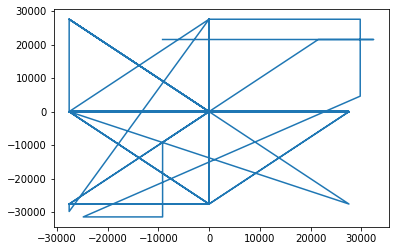

In [69]:
fig, ax = plt.subplots()
ax.plot(T_scaled[0][:100], T_scaled[1][:100])

In [70]:
wavfile.write('experimental_F_M3.wav', rate, scaled)

## Reading wav_samples and concatenating to new file

In [84]:
os.listdir('./wav_samples')

['F.M3.wav', 'F.M2.wav', '16bit.F.M3.wav']

In [85]:
wavs = {
    f: wavfile.read('./wav_samples/{}'.format(f)) 
    for f in os.listdir('./wav_samples') 
    if '16bit' not in f
}

In [86]:
wavs

{'F.M3.wav': (44100,
  array([[-0.00000000e+00, -0.00000000e+00],
         [-7.69464208e-08, -7.69464208e-08],
         [-1.01945886e-07, -1.01945886e-07],
         ...,
         [ 9.07182693e-05,  9.07182693e-05],
         [ 1.43170357e-04,  1.43170357e-04],
         [ 1.81436539e-04,  1.81436539e-04]], dtype=float32)),
 'F.M2.wav': (44100,
  array([[-0.00000000e+00, -0.00000000e+00],
         [-2.35709280e-07, -2.35709280e-07],
         [-2.33761270e-07, -2.33761270e-07],
         ...,
         [ 1.57117844e-04,  1.57117844e-04],
         [ 9.85860825e-05,  9.85860825e-05],
         [ 1.01447105e-04,  1.01447105e-04]], dtype=float32))}

In [89]:
for f, data in wavs.items():
    print_wav_info(f, data[1])

F.M3.wav
--------
Shape: (176400, 2)
dtype: float32
Minimum: -0.022244691848754883
Maximum: 0.014635562896728516


F.M2.wav
--------
Shape: (176400, 2)
dtype: float32
Minimum: -0.03287708759307861
Maximum: 0.0249786376953125




In [90]:
stacked = np.vstack([
    wavs['F.M3.wav'][1],
    wavs['F.M2.wav'][1]
])

In [91]:
print_wav_info('Stacked', stacked)

Stacked
-------
Shape: (352800, 2)
dtype: float32
Minimum: -0.03287708759307861
Maximum: 0.0249786376953125




In [92]:
wavfile.write('Stacked M3, M2.wav', rate, stacked)